In [3]:
#!pip3 install tensorflow==2.0.0-alpha0 
#https://github.com/zalandoresearch/fashion-mnist

ERROR: Could not find a version that satisfies the requirement tensorflow==2.0.0-alpha0
ERROR: No matching distribution found for tensorflow==2.0.0-alpha0


In [15]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:

In [19]:
mnist = tf.keras.datasets.fashion_mnist

Load Data

In [20]:
(training_images, training_labels), (test_images, test_labels)= mnist.load_data()

8

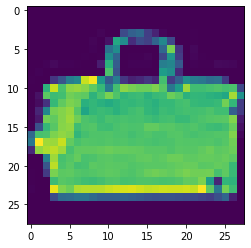

In [14]:
plt.imshow(training_images[99])
training_labels[99]

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called 'normalizing'...and fortunately in Python it's easy to normalize a list like this without looping.

In [15]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [16]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now. 

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!


In [25]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.5271 - accuracy: 0.8236
Epoch 2/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.5099 - accuracy: 0.8282
Epoch 3/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.5227 - accuracy: 0.8249s - loss: - ETA: 0s - loss: 0.5241 - accu
Epoch 4/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.4898 - accuracy: 0.8287
Epoch 5/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.4902 - accuracy: 0.8304


In [26]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 43us/sample - loss: 0.7272 - accuracy: 0.8027


[0.7272050076723099, 0.8027]

# Exploration Exercises

### Exercise 1:
Let's now look at the layers in your model. Experiment with different values for the dense layer with 1024 neurons. What different results do you get for loss, training time etc? Why do you think that's the case?

In [5]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 15s 257us/sample - loss: 0.1849 - accuracy: 0.9449
Epoch 2/5
60000/60000 [==============================] - 11s 190us/sample - loss: 0.0745 - accuracy: 0.9767
Epoch 3/5
60000/60000 [==============================] - 15s 247us/sample - loss: 0.0478 - accuracy: 0.9846
Epoch 4/5
60000/60000 [==============================] - 15s 257us/sample - loss: 0.0351 - accuracy: 0.9892
Epoch 5/5
60000/60000 [==============================] - 15s 248us/sample - loss: 0.0263 - accuracy: 0.9911


In [6]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 89us/sample - loss: 0.0823 - accuracy: 0.9756


[0.08229655201841378, 0.9756]

by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!

### Exercise 2: 

What would happen if you remove the Flatten() layer. Why do you think that's the case? 

You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of writng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

In [7]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([#tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.0.0-alpha0
Epoch 1/5


InvalidArgumentError: logits and labels must have the same first dimension, got logits shape [896,10] and labels shape [32]
	 [[{{node loss_2/output_1_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_keras_scratch_graph_233729]

### Exercise 3: 

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5

You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

In [10]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5


InvalidArgumentError: Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 4 9 6 7 5 3 8 3 6 9 8 7 9 2 4 1 4 5 1 9 7 2 5 7 2 6 9 3 4 8 2 9
	 [[{{node loss_5/output_1_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_keras_scratch_graph_294446]

### Exercise 4: 

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10. 

Ans: There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary. 

In [11]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
60000/60000 [==============================] - 11s 183us/sample - loss: 0.1847 - accuracy: 0.9432
Epoch 2/5
60000/60000 [==============================] - 10s 165us/sample - loss: 0.0802 - accuracy: 0.9750
Epoch 3/5
60000/60000 [==============================] - 12s 199us/sample - loss: 0.0562 - accuracy: 0.9827
Epoch 4/5
60000/60000 [==============================] - 11s 184us/sample - loss: 0.0404 - accuracy: 0.9868
Epoch 5/5
10000/10000 [==============================] - 1s 73us/sample - loss: 0.0802 - accuracy: 0.9774
[1.8029330e-09 4.1124672e-08 7.2152098e-08 5.8365362e-07 2.1090216e-08
 5.7006693e-09 1.7924108e-12 9.9996853e-01 7.4473477e-10 3.0723437e-05]
7


In [12]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 92us/sample - loss: 0.0802 - accuracy: 0.9774


[0.08019175834248309, 0.9774]

### Exercise 5: 

Consider the impact of training for more or less epochs. Why do you think that would be the case? 

Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases. This is a side effect of something called 'overfitting' which you can learn about [somewhere] and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

In [14]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/30
60000/60000 [==============================] - 13s 218us/sample - loss: 0.1856 - accuracy: 0.9442
Epoch 2/30
60000/60000 [==============================] - 10s 165us/sample - loss: 0.0793 - accuracy: 0.9755
Epoch 3/30
60000/60000 [==============================] - 9s 151us/sample - loss: 0.0548 - accuracy: 0.9825
Epoch 4/30
60000/60000 [==============================] - 9s 150us/sample - loss: 0.0411 - accuracy: 0.9867
Epoch 5/30
60000/60000 [==============================] - 9s 154us/sample - loss: 0.0336 - accuracy: 0.9888
Epoch 6/30
60000/60000 [==============================] - 10s 159us/sample - loss: 0.0269 - accuracy: 0.9913
Epoch 7/30
60000/60000 [==============================] - 11s 188us/sample - loss: 0.0234 - accuracy: 0.9925
Epoch 8/30
60000/60000 [==============================] - 11s 186us/sample - loss: 0.0209 - accuracy: 0.9929
Epoch 9/30
60000/60000 [==============================] - 13s 224us/sample - loss: 0.0162 - accuracy: 0.9947
Epoch 10/30
60000/6000

## Exercise 6: 

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [17]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])


Epoch 1/5
60000/60000 [==============================] - 8s 136us/sample - loss: 0.4742 - accuracy: 0.8312
Epoch 2/5
59840/60000 [============================>.] - ETA: 0s - loss: 0.3596 - accuracy: 0.8670
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 9s 152us/sample - loss: 0.3598 - accuracy: 0.8671
